In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset
%matplotlib inline

In [93]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()

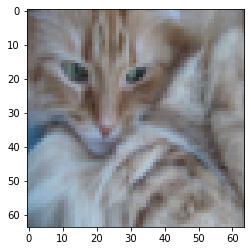

In [94]:
index = 2
plt.imshow(train_set_x_orig[index])

In [102]:
tarin_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [104]:
train_set_x = tarin_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [97]:
def sigmoid(z):
    a = 1 / (1+np.exp(-z))
    return a

In [98]:
def initialize_with_zeros(dim):
    w = np.zeros([dim,1])
    b = 0
    return (w,b)

In [62]:
def propagate(w ,b ,X ,Y):
    m = X.shape[1]
    
    # Forward propagation
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    L = - Y * np.log(A) - (1-Y) * np.log(1-A)
    J =  1 / m * np.sum(L)
    
    # Back propagation
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    J = np.squeeze(J)
    grads = {
                "dw": dw,
                "db": db
             }
    return (grads,J)

In [145]:
def optimize(w , b , X , Y , num_iterations , learning_rate , print_cost = 0):
    costs = []
    for i in range(num_iterations):
        grads , cost = propagate(w , b , X , Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % print_cost == 0:
            costs.append(cost)
        if print_cost > 0 and i % print_cost == 0:
                print(i,"-----",cost)
        
    params = {
            "w" : w,
            "b" : b
             }
    grads = {
            "dw" : dw,
            "db" : db
             }
    return (params,grads,costs)

In [125]:
def predict(w , b , X , t = -1):
    Y_prediction = np.zeros([1,X.shape[1]])
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    if t == -1:
        Y_prediction = A
    else:
        for i in range(X.shape[1]):
            Y_prediction[0,i] = 1 if A[0,i] > t else 0
    return Y_prediction

In [153]:
w, b = initialize_with_zeros(train_set_x.shape[0])

parameters , grands ,costs = optimize(w, b, train_set_x,train_set_y, num_iterations=2000, learning_rate= 0.005, print_cost=100)

train_Y_pred = predict(parameters['w'],parameters['b'],train_set_x,t = 0.5)
test_Y_pred = predict(parameters['w'],parameters['b'],test_set_x,t = 0.5)
print("训练集ACC:",1 - np.mean(np.abs(train_Y_pred - train_set_y)))
print("测试集ACC:",1 - np.mean(np.abs(test_Y_pred - test_set_y)))

0 ----- 0.6931471805599453
100 ----- 0.5912894260003538
200 ----- 0.5557961107127088
300 ----- 0.5289765131562365
400 ----- 0.5068812917435517
500 ----- 0.4878798632171657
600 ----- 0.47110827803124367
700 ----- 0.4560458096982851
800 ----- 0.4423502279336529
900 ----- 0.4297817153507784
1000 ----- 0.41816382093643273
1100 ----- 0.4073617499582191
1200 ----- 0.39726946872697994
1300 ----- 0.3878016072295409
1400 ----- 0.3788881303593958
1500 ----- 0.3704706898360003
1600 ----- 0.3625000422834636
1700 ----- 0.35493416988240534
1800 ----- 0.34773687946679727
1900 ----- 0.34087673680743863
2000 ----- 0.3343262415502278
2100 ----- 0.3280611786620027
2200 ----- 0.32206010177265726
2300 ----- 0.31630391670931673
2400 ----- 0.3107755422544872
2500 ----- 0.30545963120192193
2600 ----- 0.3003423390438105
2700 ----- 0.29541113067902147
2800 ----- 0.29065461775939866
2900 ----- 0.286062420937727
3000 ----- 0.28162505251428005
3100 ----- 0.2773338159136979
3200 ----- 0.2731807191403286
3300 ----- 

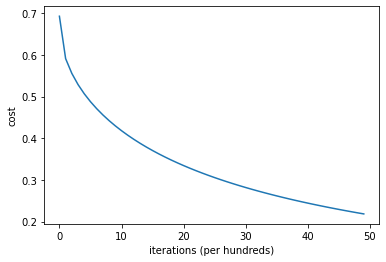

In [151]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()